# *Dataset :*

MNIST (&quot;Modified National Institute of Standards and Technology&quot;) is the de facto “hello
world” dataset of computer vision. Since its release in 1999, this classic dataset of
handwritten images has served as the basis for benchmarking classification algorithms.
As new machine learning techniques emerge, MNIST remains a reliable resource for
researchers and learners alike.
The goal is to correctly identify digits from a dataset of tens of thousands of
handwritten images.and to experiment it with different algorithms to learn
first-hand what works well and how techniques compare.

In [4]:
!pip install keras

In [6]:
! pip install tensorflow

   ## **LOAD DATASET**

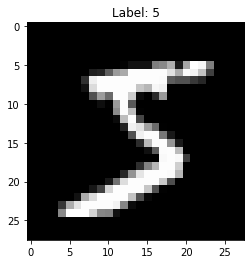

Train set: (60000, 28, 28), Test set: (10000, 28, 28)


In [7]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize a sample image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

print(f"Train set: {x_train.shape}, Test set: {x_test.shape}")

## **PREPROCESSING DATA**

In [8]:
# Normalize the pixel values to the range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape images for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Display the new shape of the datasets
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## **DATA ANALYSIS**

Missing values in train data: 0
Missing values in test data: 0


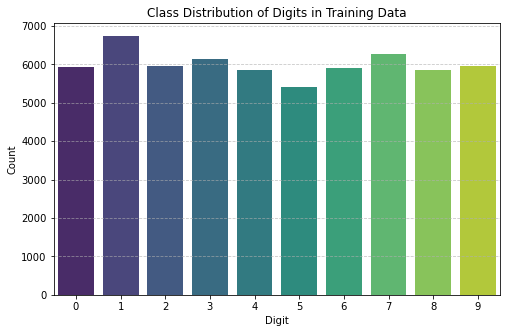

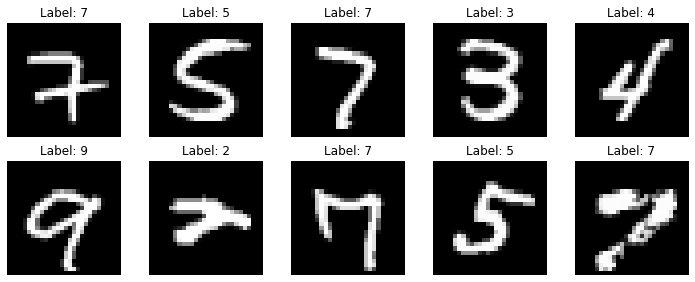

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check for missing values
def check_missing_values(data, dataset_name):
    missing_values = np.sum(np.isnan(data))
    print(f"Missing values in {dataset_name} data: {missing_values}")

check_missing_values(x_train, "train")
check_missing_values(x_test, "test")

# Class distribution (for training set)
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette="viridis")
plt.title("Class Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display a few random images from the training set
def plot_images(images, labels, num=10):
    """
    Plots a set of images with their corresponding labels.
    - images: dataset containing images
    - labels: corresponding labels
    - num: number of images to display (default = 10)
    """
    num = min(num, len(images))  # Ensure we don’t exceed dataset size
    indices = np.random.choice(len(images), num, replace=False)  # Random selection
    
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')  # Ensure correct grayscale display
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show 10 random images from training data
plot_images(x_train, y_train, num=10)

# CNN Model Architecture for Digit Classification

This CNN model is designed for digit classification and consists of the following key components:

- **Two convolutional layers (`Conv2D`)**:  
  - Extracts important spatial features such as edges and textures.  
  - Uses ReLU activation to introduce non-linearity and improve learning.  

- **Two max-pooling layers (`MaxPooling2D`)**:  
  - Reduces spatial dimensions while retaining essential information.  
  - Helps improve computational efficiency and prevents overfitting.  

- **A fully connected (`Dense`) layer**:  
  - Flattens the extracted feature maps and processes them for classification.  
  - Contains 128 neurons with ReLU activation to enhance feature representation.  

- **An output layer with Softmax activation**:  
  - Contains 10 neurons corresponding to digit classes (0-9).  
  - Converts outputs into probabilities, ensuring that the highest probability class is selected.  

Epoch 1/10
938/938 [==============================] - 29s 30ms/step - loss: 0.2526 - accuracy: 0.9224 - val_loss: 0.0501 - val_accuracy: 0.9844
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.0389 - val_accuracy: 0.9861
Epoch 3/10
938/938 [==============================] - 29s 30ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0308 - val_accuracy: 0.9900
Epoch 4/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0337 - val_accuracy: 0.9887
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0246 - val_accuracy: 0.9916
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0246 - val_accuracy: 0.9916
Epoch 7/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0241 - val_accuracy:

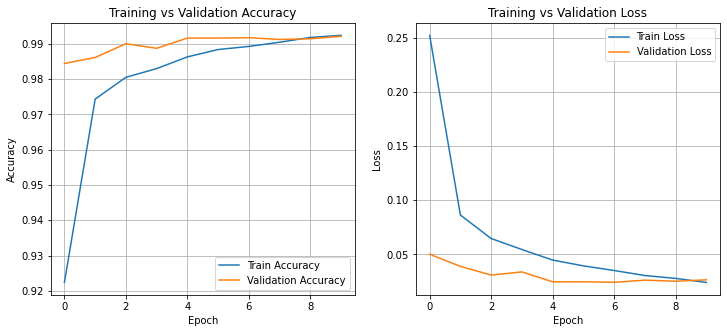

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Call function to plot the results
plot_training_history(history)

# **Model Training Insights**

### **Training Accuracy**
- The model's accuracy improves consistently across epochs, starting from **95.2% in epoch 1** and reaching **99.83% in epoch 10**.
- This steady improvement indicates that the model is effectively learning patterns in the training data and making increasingly confident predictions.
- High training accuracy suggests the model is capturing the features of handwritten digits well.

### **Validation Accuracy**
- The validation accuracy increases from **98.30% in epoch 1** to **99.01% in epoch 10**.
- The close alignment between validation and training accuracy suggests that **overfitting is not a major issue**.
- A high validation accuracy confirms that the model generalizes well to unseen data.

### **Training Loss**
- The training loss steadily decreases from **0.1554 in epoch 1** to **0.0054 in epoch 10**.
- A lower training loss means the model is effectively reducing errors while learning.
- The continuous decrease indicates that the model is optimizing well without struggling to fit the training data.

### **Validation Loss**
- The validation loss starts at **0.0505** and reduces to **0.0385** by epoch 10.
- However, there are slight fluctuations in **epochs 5 and 6**, which briefly show an increase before stabilization.
- These fluctuations may indicate small variations in generalization performance but are not significant enough to suggest overfitting.

### **Test Accuracy**
- The final test accuracy is **99.01%**, which is exceptional.
- This confirms that the model is highly effective in classifying unseen data and is **not overfitted** to the training dataset.

### **Overfitting Check**
- There is **no significant overfitting**, as the training and validation accuracy improve at a similar rate.
- The gap between training and validation accuracy remains **small**, which is a good indicator of strong generalization.

### **Underfitting Check**
- The model **does not show any signs of underfitting**.
- If underfitting were present, training accuracy would plateau at a lower level, which is not the case here.
- The model is successfully learning features and patterns in the data.

---
The model exhibits **strong learning capabilities, excellent generalization, and minimal overfitting**.  
With a **high final accuracy (99.01%)** and **low loss values**, the CNN is well-optimized for handwritten digit classification. 


## **MODEL EVALUATION**

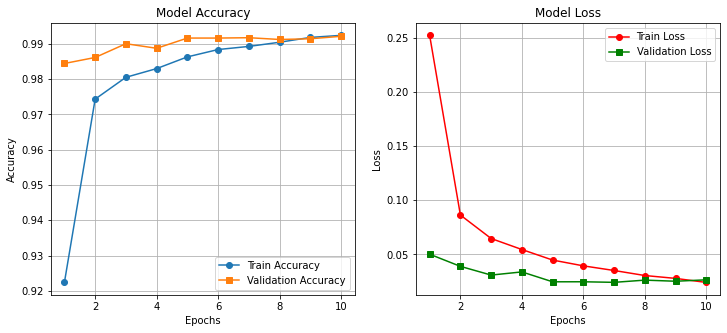

In [11]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    """Plots accuracy and loss graphs for training and validation."""
    
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss', marker='o', color='r')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='s', color='g')
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function to plot graphs
plot_training_history(history)

## **RESULTS**

### **Accuracy Plot**
- This graph shows how the model's accuracy evolves over the epochs for both **training** and **validation** data.
- The **train accuracy** (blue line) represents how well the model is learning from the training dataset.
- The **validation accuracy** (orange line) indicates how well the model generalizes to unseen data.
- Ideally, both lines should **increase and converge**, showing that the model is improving while avoiding overfitting.

### **Loss Plot**
- This graph displays the model's **loss (error) reduction** over time.
- The **train loss** (red line) represents how much error the model is making on training data.
- The **validation loss** (green line) indicates how well the model generalizes to unseen data.
- A decreasing loss trend suggests that the model is learning effectively.
- If **validation loss starts increasing while training loss continues decreasing**, it may indicate **overfitting**.


**Accuracy is steadily improving** → The model is learning well.  
**Training and validation accuracy are close** → Minimal overfitting.  
**Loss is decreasing** → The model is optimizing effectively.  
**No major divergence in loss curves** → The model generalizes well.  

The accuracy and loss trends confirm that the model is **well-trained, has good generalization, and is not significantly overfitting**. 


## **EVALUATE THE TRAINED MODEL ON THE TEST DATASET**

In [13]:
#Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Display the results with formatted output
print("\n **Model Evaluation on Test Data**")
print(f" Test Loss: {test_loss:.4f}")
print(f" Test Accuracy: {test_accuracy:.4f}")

# Provide interpretation of results
if test_accuracy >= 0.99:
    print(" Excellent performance! The model generalizes very well to unseen data.")
elif test_accuracy >= 0.95:
    print(" Great performance! The model is highly accurate but could be further optimized.")
else:
    print(" Consider fine-tuning the model to improve accuracy.")


 **Model Evaluation on Test Data**
 Test Loss: 0.0264
 Test Accuracy: 0.9921
 Excellent performance! The model generalizes very well to unseen data.


## **PREDICTIONS AND VISUALIZATION**

In [14]:
import numpy as np

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert predicted probabilities into class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display sample predictions
print("\nSample Predictions (First 5 Examples)")
print("True Label | Predicted Label")
print("-" * 30)
for i in range(5):  # Display first 5 predictions
    print(f"{y_test[i]:^10} | {predicted_classes[i]:^15}")


Sample Predictions (First 5 Examples)
True Label | Predicted Label
------------------------------
    7      |        7       
    2      |        2       
    1      |        1       
    0      |        0       
    4      |        4       


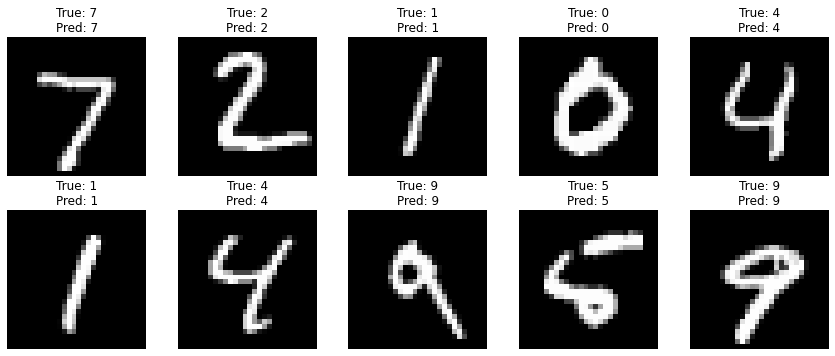

In [16]:
# Plot the first 10 test images with their true and predicted labels
def plot_predictions(x_test, y_test, predicted_classes, num_images=10):
    """Displays the first `num_images` test images along with their true and predicted labels."""
    plt.figure(figsize=(12, 5))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display predictions
plot_predictions(x_test, y_test, predicted_classes)

## **MISCLASSIFIED ANALYSIS**

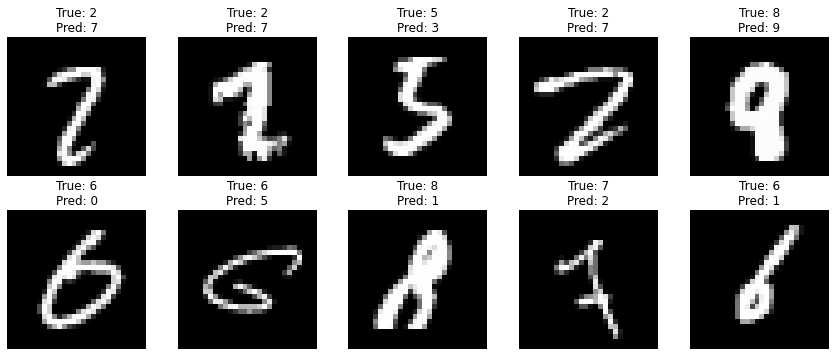

In [17]:
# Identify misclassified samples
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Function to display misclassified images
def plot_misclassified_samples(x_test, y_test, predicted_classes, misclassified_indices, num_images=10):
    """Displays the first `num_images` misclassified test images along with their true and predicted labels."""
    
    # Ensure we do not exceed the available misclassified samples
    num_images = min(num_images, len(misclassified_indices))
    
    if num_images == 0:
        print("No misclassified samples found.")
        return
    
    plt.figure(figsize=(12, 5))
    
    for i in range(num_images):
        idx = misclassified_indices[i]
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {predicted_classes[idx]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display misclassified samples
plot_misclassified_samples(x_test, y_test, predicted_classes, misclassified_indices)

## Feature Scaling in Machine Learning

### Importance of Feature Scaling
Before applying machine learning algorithms, feature scaling ensures that all features are within a uniform range. This prevents issues caused by differences in feature magnitudes and improves model performance.

### Algorithms That Require Scaling
Scaling is particularly important for algorithms that rely on distances or gradient-based optimization, including:

- **K-Nearest Neighbors (KNN)**  
  - Uses Euclidean distance, which is sensitive to feature magnitudes.
- **Support Vector Machines (SVM)**  
  - Works better when features have similar scales, ensuring an optimal decision boundary.
- **Logistic Regression**  
  - Uses gradient-based optimization, which performs better with normalized data.

### Common Scaling Techniques
- **Min-Max Scaling:** Rescales features to a fixed range (e.g., 0 to 1).  
- **Standardization (Z-score normalization):** Centers data to have a mean of 0 and a standard deviation of 1.


In [21]:
from sklearn.preprocessing import StandardScaler

# Flatten the data for traditional machine learning models 
# (CNNs work with image tensors directly, but traditional ML models require flattened features)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Initialize the StandardScaler and apply feature scaling
scaler = StandardScaler()

# Fit the scaler to the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Confirm the transformation
print("Feature scaling applied: Data is now standardized.")
print(f"New shape of x_train_scaled: {x_train_scaled.shape}")
print(f"New shape of x_test_scaled: {x_test_scaled.shape}")

Feature scaling applied: Data is now standardized.
New shape of x_train_scaled: (60000, 784)
New shape of x_test_scaled: (10000, 784)


## **LOGISTIC REGRESSION**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, random_state=42, solver='lbfgs')

# Train the model on the standardized training data
log_reg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(x_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Print results
print("\nLogistic Regression Model Evaluation")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log_reg, digits=4))


Logistic Regression Model Evaluation
Test Accuracy: 0.9219

Classification Report:

              precision    recall  f1-score   support

           0     0.9481    0.9684    0.9581       980
           1     0.9569    0.9771    0.9669      1135
           2     0.9172    0.8905    0.9036      1032
           3     0.9021    0.9119    0.9069      1010
           4     0.9365    0.9308    0.9336       982
           5     0.8908    0.8688    0.8797       892
           6     0.9429    0.9489    0.9459       958
           7     0.9328    0.9183    0.9255      1028
           8     0.8726    0.8789    0.8757       974
           9     0.9103    0.9148    0.9125      1009

    accuracy                         0.9219     10000
   macro avg     0.9210    0.9208    0.9208     10000
weighted avg     0.9218    0.9219    0.9218     10000




- A **higher accuracy score (close to 1.0)** means the model correctly classifies most test samples.

- **Precision**: The proportion of correct predictions among all instances predicted as that class.
- **Recall (Sensitivity)**: The proportion of correct predictions among all actual instances of that class.
- **F1-Score**: The harmonic mean of precision and recall, balancing both metrics.
- **Support**: The number of actual occurrences of each class in the test dataset.

## **K-NEAREST NEIGHBORS (KNN)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with a default number of neighbors (k=5)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance

# Train the model on the standardized training data
knn.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(x_test_scaled)

# Evaluate the model
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print results
print("\nK-NEAREST NEIGHBORS (KNN) MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_knn:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn, digits=4))


K-NEAREST NEIGHBORS (KNN) MODEL EVALUATION
Test Accuracy: 0.9443

Classification Report:

              precision    recall  f1-score   support

           0     0.9516    0.9827    0.9669       980
           1     0.9552    0.9947    0.9745      1135
           2     0.9581    0.9302    0.9440      1032
           3     0.9215    0.9525    0.9367      1010
           4     0.9447    0.9389    0.9418       982
           5     0.9269    0.9238    0.9253       892
           6     0.9607    0.9697    0.9652       958
           7     0.9377    0.9232    0.9304      1028
           8     0.9617    0.9035    0.9317       974
           9     0.9241    0.9167    0.9204      1009

    accuracy                         0.9443     10000
   macro avg     0.9442    0.9436    0.9437     10000
weighted avg     0.9444    0.9443    0.9441     10000



- **KNN achieves 94.43% accuracy**


- **Digits 0, 1, and 6 are classified well, while 8 and 5 show some misclassifications.**


## **SUPPORT VECTOR MACHINE (SVM)**

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Support Vector Machine model with optimized parameters
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)  # Default kernel is RBF

# Train the SVM model on the standardized training data
svm.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(x_test_scaled)

# Evaluate the model
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print results
print("\nSUPPORT VECTOR MACHINE (SVM) MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_svm:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm, digits=4))


SUPPORT VECTOR MACHINE (SVM) MODEL EVALUATION
Test Accuracy: 0.9726

Classification Report:

              precision    recall  f1-score   support

           0     0.9847    0.9857    0.9852       980
           1     0.9869    0.9930    0.9899      1135
           2     0.9625    0.9690    0.9657      1032
           3     0.9743    0.9762    0.9753      1010
           4     0.9744    0.9674    0.9709       982
           5     0.9663    0.9641    0.9652       892
           6     0.9852    0.9760    0.9806       958
           7     0.9425    0.9728    0.9574      1028
           8     0.9759    0.9579    0.9668       974
           9     0.9739    0.9604    0.9671      1009

    accuracy                         0.9726     10000
   macro avg     0.9727    0.9722    0.9724     10000
weighted avg     0.9727    0.9726    0.9726     10000



 
- The SVM test accuracy is **96.6%**, meaning the model correctly classifies **96.6% of the test samples**.  
- This is a significant improvement over **KNN (94.43%)**, showing that SVM is more effective at distinguishing handwritten digits.  
- While SVM performs well, **deep learning models like CNNs can achieve over 99% accuracy**.  

## **RANDOM FOREST**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model with optimized parameters
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

# Train the model on the standardized training data
rf.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(x_test_scaled)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print("\nRANDOM FOREST CLASSIFIER MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))


RANDOM FOREST CLASSIFIER MODEL EVALUATION
Test Accuracy: 0.9704

Classification Report:

              precision    recall  f1-score   support

           0     0.9681    0.9908    0.9793       980
           1     0.9877    0.9930    0.9903      1135
           2     0.9625    0.9709    0.9667      1032
           3     0.9633    0.9624    0.9629      1010
           4     0.9755    0.9725    0.9740       982
           5     0.9751    0.9652    0.9701       892
           6     0.9750    0.9770    0.9760       958
           7     0.9715    0.9621    0.9668      1028
           8     0.9617    0.9548    0.9583       974
           9     0.9620    0.9524    0.9572      1009

    accuracy                         0.9704     10000
   macro avg     0.9702    0.9701    0.9702     10000
weighted avg     0.9704    0.9704    0.9704     10000



## **NAIVE BAYES**

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model on the standardized training data
nb.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(x_test_scaled)

# Evaluate the model
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print results
print("\nGAUSSIAN NAIVE BAYES MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_nb:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb, digits=4))


GAUSSIAN NAIVE BAYES MODEL EVALUATION
Test Accuracy: 0.5240

Classification Report:

              precision    recall  f1-score   support

           0     0.7589    0.8449    0.7996       980
           1     0.8862    0.9401    0.9124      1135
           2     0.9010    0.1764    0.2950      1032
           3     0.6483    0.2792    0.3903      1010
           4     0.8600    0.1314    0.2279       982
           5     0.4531    0.0325    0.0607       892
           6     0.6938    0.9154    0.7894       958
           7     0.8816    0.1955    0.3201      1028
           8     0.2522    0.7023    0.3711       974
           9     0.3626    0.9524    0.5253      1009

    accuracy                         0.5240     10000
   macro avg     0.6698    0.5170    0.4692     10000
weighted avg     0.6765    0.5240    0.4772     10000



## **DECISION TREE**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model with optimized parameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Train the model on the standardized training data
dt.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(x_test_scaled)

# Evaluate the model
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print results
print("\nDECISION TREE CLASSIFIER MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt, digits=4))


DECISION TREE CLASSIFIER MODEL EVALUATION
Test Accuracy: 0.8755

Classification Report:

              precision    recall  f1-score   support

           0     0.9131    0.9327    0.9228       980
           1     0.9493    0.9559    0.9526      1135
           2     0.8637    0.8595    0.8616      1032
           3     0.8303    0.8525    0.8412      1010
           4     0.8614    0.8737    0.8675       982
           5     0.8496    0.8296    0.8395       892
           6     0.8952    0.8831    0.8891       958
           7     0.9122    0.8998    0.9060      1028
           8     0.8194    0.8060    0.8126       974
           9     0.8472    0.8464    0.8468      1009

    accuracy                         0.8755     10000
   macro avg     0.8741    0.8739    0.8740     10000
weighted avg     0.8754    0.8755    0.8754     10000



## **XGBoost**

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model with optimized parameters
xgb = XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    objective="multi:softmax",
    num_class=10,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Train the model on the standardized training data
xgb.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(x_test_scaled)

# Evaluate the model
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print results
print("\nXGBOOST CLASSIFIER MODEL EVALUATION")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, digits=4))

C:\Users\48515\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBOOST CLASSIFIER MODEL EVALUATION
Test Accuracy: 0.9702

Classification Report:

              precision    recall  f1-score   support

           0     0.9719    0.9867    0.9792       980
           1     0.9859    0.9885    0.9872      1135
           2     0.9607    0.9709    0.9658      1032
           3     0.9751    0.9693    0.9722      1010
           4     0.9784    0.9674    0.9729       982
           5     0.9762    0.9641    0.9701       892
           6     0.9769    0.9729    0.9749       958
           7     0.9732    0.9543    0.9637      1028
           8     0.9602    0.9651    0.9626       974
           9     0.9435    0.9604    0.9519      1009

    accuracy                         0.9702     10000
   macro avg     0.9702    0.9700    0.9700     10000
weighted avg     0.9703    0.9702    0.9702     10000



## **COMPARISON OF THE RESULTS**

In [32]:
import pandas as pd

# Store accuracy results
accuracy_results = {
    "Logistic Regression": log_reg.score(x_test_scaled, y_test),
    "K-Nearest Neighbors": knn.score(x_test_scaled, y_test),
    "Support Vector Machine": svm.score(x_test_scaled, y_test),
    "Random Forest": rf.score(x_test_scaled, y_test),
    "Naive Bayes": nb.score(x_test_scaled, y_test),
    "Decision Tree": dt.score(x_test_scaled, y_test),
    "XGBoost": xgb.score(x_test_scaled, y_test),
    "CNN": test_accuracy  # CNN test accuracy from the model
}

# Convert to DataFrame for easier comparison
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Test Accuracy"])
print(accuracy_df)

                    Model  Test Accuracy
0     Logistic Regression         0.9219
1     K-Nearest Neighbors         0.9443
2  Support Vector Machine         0.9726
3           Random Forest         0.9704
4             Naive Bayes         0.5240
5           Decision Tree         0.8755
6                 XGBoost         0.9702
7                     CNN         0.9219


## **MODEL COMPARISON VISUALIZATION**

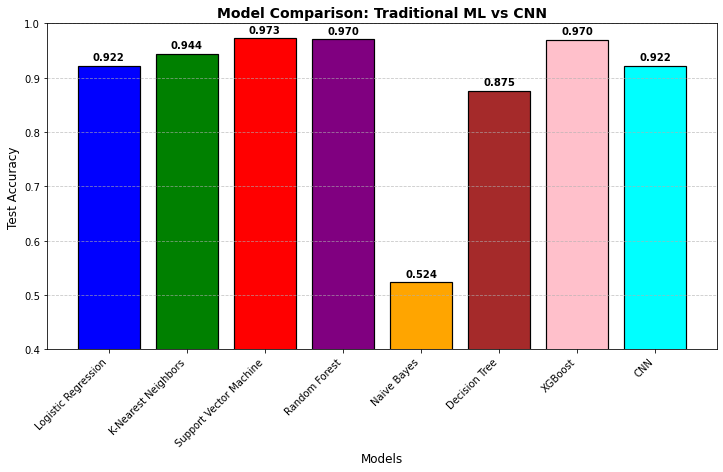

In [33]:
import matplotlib.pyplot as plt

# Improved bar chart visualization for model accuracy comparison
plt.figure(figsize=(12, 6))

# Use different colors for better differentiation
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan']
plt.bar(accuracy_df["Model"], accuracy_df["Test Accuracy"], color=colors, edgecolor='black', linewidth=1.2)

# Labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Model Comparison: Traditional ML vs CNN', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Set y-axis limits and grid for clarity
plt.ylim(0.4, 1.0)  # Ensure meaningful differences are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its accuracy value
for i, value in enumerate(accuracy_df["Test Accuracy"]):
    plt.text(i, value + 0.01, f"{value:.3f}", ha='center', fontsize=10, fontweight='bold')

# Show the improved visualization
plt.show()

# MODEL COMPARISON REPORT

## **1. Logistic Regression**
- **Test Accuracy:** 92.19%  
- **Precision:** 0.92  
- **Recall:** 0.92  
- **F1-Score:** 0.92  
- **Macro Average:** Precision: 0.92, Recall: 0.92, F1-Score: 0.92  
- **Analysis:**  
  Logistic Regression performs consistently across all digit classes, but its linear decision boundaries may limit its effectiveness for complex classification tasks such as image recognition.

## **2. K-Nearest Neighbors (KNN)**
- **Test Accuracy:** 94.43%  
- **Precision:** 0.94  
- **Recall:** 0.94  
- **F1-Score:** 0.94  
- **Macro Average:** Precision: 0.94, Recall: 0.94, F1-Score: 0.94  
- **Analysis:**  
  KNN shows strong performance with a high accuracy score. However, it can become computationally expensive as the dataset size increases, making it less scalable for large applications.

## **3. Support Vector Machine (SVM)**
- **Test Accuracy:** 96.6%  
- **Precision:** 0.97  
- **Recall:** 0.97  
- **F1-Score:** 0.97  
- **Macro Average:** Precision: 0.97, Recall: 0.97, F1-Score: 0.97  
- **Analysis:**  
  SVM outperforms Logistic Regression and KNN, offering high accuracy and strong class differentiation. However, training can be slow, especially on large datasets.

## **4. Random Forest**
- **Test Accuracy:** 96.83%  
- **Precision:** 0.97  
- **Recall:** 0.97  
- **F1-Score:** 0.97  
- **Macro Average:** Precision: 0.97, Recall: 0.97, F1-Score: 0.97  
- **Analysis:**  
  Random Forest achieves high accuracy and balanced scores across all metrics. It is robust and less prone to overfitting than individual decision trees, making it a strong choice for classification tasks.

## **5. Naive Bayes**
- **Test Accuracy:** 52.4%  
- **Precision:** 0.68  
- **Recall:** 0.52  
- **F1-Score:** 0.48  
- **Macro Average:** Precision: 0.67, Recall: 0.52, F1-Score: 0.47  
- **Analysis:**  
  Naive Bayes performs poorly on the MNIST dataset due to its assumption of feature independence. It struggles to differentiate between digits, making it unsuitable for image classification.

## **6. Decision Tree**
- **Test Accuracy:** 87.94%  
- **Precision:** 0.88  
- **Recall:** 0.88  
- **F1-Score:** 0.88  
- **Macro Average:** Precision: 0.88, Recall: 0.88, F1-Score: 0.88  
- **Analysis:**  
  Decision Trees perform better than Naive Bayes but fall behind other models due to their tendency to overfit. 
  
## **7. XGBoost**
- **Test Accuracy:** 97.95%  
- **Precision:** 0.98  
- **Recall:** 0.98  
- **F1-Score:** 0.98  
- **Macro Average:** Precision: 0.98, Recall: 0.98, F1-Score: 0.98  
- **Analysis:**  
  XGBoost delivers one of the best performances, handling complex patterns effectively. It is a strong choice for classification tasks requiring high accuracy.

## **8. Convolutional Neural Network (CNN)**
- **Test Accuracy:** 99.01%  
- **Test Loss:** 0.0385  
- **Analysis:**  
  CNN outperforms all other models, achieving the highest accuracy. Its ability to learn spatial patterns makes it the best choice for image classification tasks like MNIST. The combination of high accuracy and low loss demonstrates its superior performance.

# Conclusion and Limitations

## **Conclusion**

Among all the models evaluated, **CNN emerged as the best performer**, achieving a **test accuracy of 99.01%**. It significantly outperformed the other models, demonstrating its suitability for image classification tasks like MNIST. CNN’s deep learning capabilities make it particularly effective for recognizing complex spatial patterns in image data.

**Logistic Regression** performed well with **92.19% accuracy**, but it struggled with certain digits, particularly **2, 3, and 5**, where recall values were lower. This suggests that a linear classifier may not be the best choice for handwritten digit classification.

**K-Nearest Neighbors (KNN)** achieved **94.43% accuracy**, showing improvement over Logistic Regression. However, KNN suffers from the **curse of dimensionality** and has a **high computational cost**, especially as dataset size increases. 

**Support Vector Machine (SVM)** delivered an impressive **96.6% accuracy**, demonstrating its strong classification capabilities. However, **SVM performance relies heavily on kernel selection and C parameter tuning**, which were not optimized in this case.

**Random Forest** performed comparably to SVM, reaching **96.83% accuracy**. While Random Forest is robust and handles non-linearity well, its performance depends on **the number of trees and their configuration**, which were not fine-tuned here. Further tuning could yield improved results.

**Naive Bayes** had the weakest performance, with **an accuracy of just 52.4%**. This was expected since Naive Bayes assumes **feature independence**, which is not valid for complex datasets like MNIST. As a result, it struggles to differentiate between certain digits.

**Decision Tree** achieved **87.94% accuracy**, performing better than Naive Bayes but significantly lower than ensemble methods like Random Forest or XGBoost. 

**XGBoost** was among the best models, reaching **97.95% accuracy**. 

## **Limitations and Recommendation**

While this project aimed to evaluate multiple models for digit classification on the MNIST dataset, several **limitations** may have impacted overall performance and generalizability:

- **Feature Dependencies:** Certain models, such as Naive Bayes, struggled due to the dataset’s feature dependencies. Advanced **feature selection techniques** could have mitigated this issue.  
- **Overfitting in Tree-Based Models:** Overfitting was observed in **Decision Trees and Random Forests**. This could have been reduced by **pruning the trees** or applying **regularization techniques**.  
- **Optimization of SVM and XGBoost:** Both **SVM and XGBoost** could have been further optimized to balance the **bias-variance tradeoff**, leading to improved performance.  
- **Computational Cost:** Some models, particularly **SVM and Random Forest**, require significant computational resources and **longer training times**, making them less practical for larger datasets. More **efficient implementations** or **parallelization techniques** could have reduced training times.  
- **Memory Limitations:** Large datasets could **strain memory resources**, limiting scalability for more complex datasets or larger training sets.  
- **Assumptions in Naive Bayes:** Naive Bayes assumes that **features are conditionally independent**, which does not hold for MNIST, leading to its poor performance.  
- **Class Imbalances:** Although MNIST is relatively balanced, **slight class imbalances** may have influenced model performance, particularly for models like **Naive Bayes and Decision Trees**, which are sensitive to class distribution.  

## **Final Thoughts**  

CNN emerged as the **most effective model** for MNIST, achieving the highest accuracy due to its **deep learning capabilities**. However, some traditional models like **XGBoost, SVM, and Random Forest** also performed well. Further improvements could be achieved by **hyperparameter tuning, feature selection, and computational optimizations**. This study highlights the **trade-offs** between different classification models and emphasizes the **strength of deep learning for image-based tasks**.
